# Tinder project

L'application Tinder est une application de rencontres. Sa finalité est de permettre le matching parfait entre deux utilisateurs "destinés". Le problème posé dans ce projet se résume à une diminution des rencontres.

Ce projet s'inscrit dans le bloc #2 de la certification. Cet exercice s'y prête parfaitement car l'exploration de données (EDA) est essentielle dans ce contexte.

En effet, Tinder souhaite comprendre pourquoi il y a de moins en moins de "match" entre les prétendant.e.s de son application. C'est la raison pour laquelle des mesures ont été prises durant un speed dating échelonné sur plusieurs mois. Chaque ligne décrit les mesures prises pour un participant, de ses préférences aux personnes qu'il/elle a rencontrées et les matchs obtenus ou pas.

L'objectif est donc de comprendre les participants, les interactions et leurs liens avec la variable target (match) afin de préparer une utilisation par la suite d'un modèle permettant de prédire le match et ainsi de comprendre les conditions favorables, notamment au niveau des attentes des hommes et des femmes...


In [ ]:
###################################################
#  Initialisation du notebook et du dataset
###################################################
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

df = pd.read_csv('Speed+Dating+Data.csv', encoding='iso-8859-1', thousands=',') # ajouter thousands avec la virgule pour tenir compte du format américain d'affichage des milliers.
pd.options.display.max_columns = None # Evite de tronquer le display des columns


###################################################
#  Nous allons tout de suite controler le dataset
###################################################
print("Dataset opérationnel : df")
df.describe(include='all')

Dataset opérationnel : df


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133.000000,3583.000000,8315.000000,8299.000000,8299.000000,8299,7.314000e+03,4279.000000,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,NaN,NaN,NaN,NaN,NaN,269,NaN,NaN,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# Informations sur le dataset

## Un dataset de 8378 lignes sur 195 colonnes

In [ ]:
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

Nombre de lignes : 8378
Nombre de colonnes : 195


Aperçu de la dernière ligne du dataframe comportant un maximum de cellules remplies.
Le nombre de colonnes est trop important pour voir toutes les colonnes. Il s'agit d'un aperçu mais dans l'exploration des données, nous utiliserons des dataframe partiels permettant de concentrer notre attention sur l'ensemble des colonnes utiles.

In [ ]:
df[-1:]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8377,552,NaN,1,44,2,21,22,2,10.0,15,22,530.0,0,0.01,0,22.0,4.0,20.0,20.0,10.0,15.0,5.0,30.0,1,8.0,8.0,7.0,7.0,7.0,7.0,8.0,5.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,78110.0,NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,3.0,7.0,6.0,4.0,8.0,1.0,4.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


Le découpage du dataframe principal pour une meilleure visibilité.

## Identification de la variable Target
Dans la mesure où la problématique de Tinder porte sur la baisse du nombre de "match", c'est donc cette colonne qui sera ma variable target.

Néanmoins, il serait intéressant de suivre la variable ***dec*** car il s'agit de la décision positive ou négative pour chaque participant, sans même qu'il y ait eu un ***match***.


In [ ]:
df["match"].describe()

count    8378.000000
mean        0.164717
std         0.370947
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: match, dtype: float64

Cette donnée est fournie pour toutes les 8378 lignes de mon dataset. La variable target est donc complète pour l'ensemble du dataframe.

In [ ]:
df["dec"].describe()

count    8378.000000
mean        0.419909
std         0.493573
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: dec, dtype: float64

## Nombre de "match"
Il y a eu 1380 "Match" durant l'opération.

In [ ]:
df['match'].sum()

1380

## Analyse des valeurs manquantes

On remarque des données manquantes anormales par endroit. Mais on peut remarquer visuellement que certains lots de données manquent.

En visualisant graphiquement les données manquantes, on se rend compte que certaines données ont été prises à des moments précis. C'est précisément ce que l'on retrouve, par exemple dans le haut du graphique. On a 5 blocs de données manquantes faisant exactement la même longueur. Il s'agit d'une séquence de l'opération.

Niveau de remplissage des colonnes : 432016 sur 1633710 cellules, soit 26.44% de données manquantes

Visualisation des données manquantes dans le dataframe : 



<Axes: >

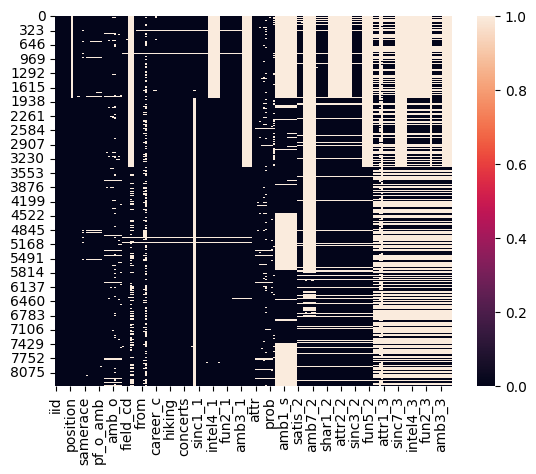

In [ ]:
pourcentage_na = ( (df.isna().sum().sum())*100) / (df.shape[0]*df.shape[1])
pourcentage_na = np.round(pourcentage_na, decimals=2)
print(f"Niveau de remplissage des colonnes : {df.isna().sum().sum()} sur {df.shape[0]*df.shape[1]} cellules, soit {pourcentage_na}% de données manquantes")
print()
print("Visualisation des données manquantes dans le dataframe : ")
print()
# Les valeurs manquantes
sns.heatmap(df.isna())

In [ ]:
print("Aperçu des colonnes et de leur format :")
print()
# Les valeurs manquantes
df.info()

Aperçu des colonnes et de leur format :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(178), int64(13), object(4)
memory usage: 12.5+ MB


# Exploration des données sur les participants
L'exploration (EDA) des données a été particulièrement délicate. Le dataset sur 193 colonnes données annonce une quantité intéressante de données quantitatives et qualitatives. Seulement, l'enjeu est de structurer ces données afin d'étudier le dataset avec plus de clarté et de finesse.


1.   Analyse du dataset fourni
2.   Découpage du dataset en catégories
3.   Nettoyage et exploitation des données au cas par cas(1)

*(1) : Avec un dataset de 195 colonnes, nous n'allons nettoyer les données et compléter les valeurs manquantes que si nous en avons réellement besoin. Autrement, nous risquons de perdre du temps à préparer des colonnes que nous risquons de ne pas utiliser.*

Pour mon analyse, j'ai restreint mon dataset aux données personnelles des participants. J'ai donc conservé les colonnes suivantes :

'iid', 'gender', 'age', 'field', 'field_cd', 'undergra', 'mn_sat',
       'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income',
       'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',
       'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1',
       'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1' et 'amb5_1'.

En réduisant mon dataset, je peux voir toutes les colonnes.

In [ ]:
# Création du dataframe sd_participants
id_participant = df['iid']
sd_participants_gender = df['gender']
#sd_participants_target= df['match']
#sd_participants_dec = df['dec']
sd_participants_reponses = df.iloc[:, 33:97] # Cible les réponses au questionnaire
sd_participants = pd.concat([id_participant, sd_participants_gender, sd_participants_reponses], axis=1)  #axis=1 pour conserver le label iid
sd_participants = sd_participants.drop_duplicates()

print(">> Liste des colonnes :")
print(sd_participants.columns)
print()
print(">> Aperçu :")
display(sd_participants.head())
print()


>> Liste des colonnes :
Index(['iid', 'gender', 'age', 'field', 'field_cd', 'undergra', 'mn_sat',
       'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income',
       'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',
       'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1',
       'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1',
       'amb5_1'],
      dtype='object')

>> Aperçu :


,iid,gender,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1
0,1,0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,60521.0,69487.0,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,35223.0,65929.0,1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN
20,3,0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,6268.0,NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
30,4,0,23.0,Law,1.0,NaN,NaN,NaN,2.0,1.0,1.0,Texas,77096.0,37754.0,1.0,5.0,1.0,lawyer/policy work,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,20.0,20.0,20.0,20.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,30.0,10.0,15.0,30.0,5.0,10.0,7.0,8.0,9.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN
40,5,0,21.0,Law,1.0,NaN,NaN,NaN,2.0,8.0,1.0,Bowdoin College,94022.0,86340.0,2.0,4.0,1.0,lawyer,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,7.0,10.0,20.0,5.0,25.0,25.0,10.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,20.0,5.0,5.0,6.0,3.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Nombre de lignes : {sd_participants.shape[0]}")
print(f"Nombre de colonnes : {sd_participants.shape[1]}")



Nombre de lignes : 551
Nombre de colonnes : 66


# Participants à l'opération Speed dating


## 551 participants sur toute l'opération

In [64]:
#nombre de participants
nb_participants = sd_participants['iid'].count()
print(f"Il y a eu {nb_participants} participants à l'opération Speed dating")


Il y a eu 551 participants à l'opération Speed dating


## Analyse des participants par Wave
Le speed Dating est échelonné sur plusieurs mois :
* Il y a eu 21 waves
* Chaque participant (sujet analysé) n'a participé qu'à une seule wave
* Une participation croissante du nombre de participants

In [ ]:
nb_total_waves = len(df['wave'].unique())
nb_total_waves

21

21 waves au total

In [ ]:
#Chaque participant a participé à combien de waves ?
multiple_wave = df.groupby(df['iid'])['wave'].nunique()
multiple_wave.describe()

count    551.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: wave, dtype: float64

Chaque sujet analysé a participé à un minimum de 1 wave et à un maximum de 1 wave.
Conclusion : Chaque sujet (iid) n'a participé qu'à une seule wave.

In [ ]:
print(">> Nombre de participants et de match par wave dans l'ordre croissant du nombre de participants :")
print()
waves = pd.DataFrame()
waves['nb_participants'] = df.groupby(df['wave'])['iid'].nunique() # On reprend le id (identifiant unique DANS la wave) le plus grand (max) pour chaque soirée (wave)
waves['nb_match'] = (df['match'].groupby(df['wave']).sum()) # Un match est enregistré pour l'homme et la femme. En macro, on comptera les matchs uniques seulement.
waves


>> Nombre de participants et de match par wave dans l'ordre croissant du nombre de participants :



,nb_participants,nb_match
wave,,
1,20,62
2,35,62
3,20,26
4,36,130
5,19,54
6,10,10
7,32,86
8,20,36
9,40,124


Y a-t-il une relation entre le nombre de participants et le nombre de match ?

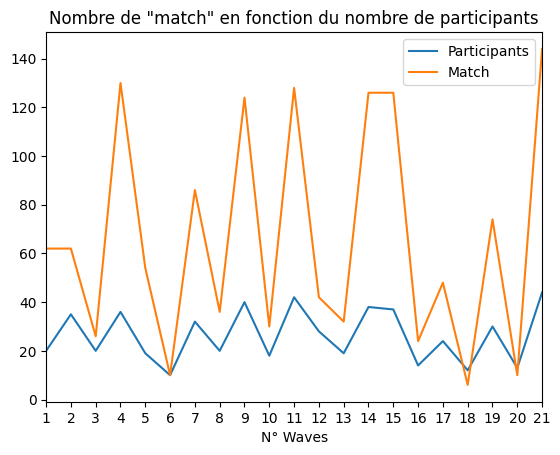

In [ ]:
ax = sns.lineplot(waves, x='wave', y="nb_participants", label="Participants")
sns.lineplot(waves, x='wave', y="nb_match", ax=ax, label="Match")
ax.set(xlabel='N° Waves', ylabel='', title='Nombre de "match" en fonction du nombre de participants')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlim(1,nb_total_waves) # Affiche les valeurs en abscisse de 1 au nombre total de waves (21)
ax.legend(loc="upper right")



Graphiquement, on voit une relation entre le nombre de participants et le nombre de match :
* Quand le nombre de participants augmente, le nombre de match augmente aussi, et inversement.

* Les waves n°6, 18 et 20 connaissent une situation particulière où la courbe des "match" touche ou passe sous la courbe du nombre de participants :
  * #6 : on a 10 participants (5 femmes, 5 hommes)
  * #18 : on a 12 participants (6 femmes, 6 hommes)
  * #21 : on a 44 participants (22 femmes, 22 hommes)

Affichons les waves, cette fois-ci en observant :
* Le nombre de participants dans l'ordre décroissant pour observer la tendance sur les match
* En ajoutant une dimension qui est le ratio Match par rapport au nombre de participants.

In [ ]:
# Afficher les wave dans l'ordre croissant du nombre de participants
waves = waves.sort_values(by=['nb_participants'])

# Calculer un ratio de nb_match par rapport au nb_participants
# Je le monte au carré pour démultiplier les variations afin de les comparer (sinon la courbe sera trop flat)
waves['ratio_match'] = (waves['nb_match'] / waves['nb_participants'])**2
display(waves)


,nb_participants,nb_match,ratio_match
wave,,,
6,10,10,1.000000
18,12,6,0.250000
20,13,10,0.591716
16,14,24,2.938776
10,18,30,2.777778
13,19,32,2.836565
5,19,54,8.077562
1,20,62,9.610000
3,20,26,1.690000


**>> Variation de la participation**

In [ ]:
# Affichage du MINIMUM
min_participants = waves['nb_participants'].min()
min = waves[:1]
wave_min_participants = min.index[0]

# Affichage du MAXIMUM
max_participants = waves['nb_participants'].max()
max = waves[-1:]
#print(max)
wave_max_participants = max.index[0]
print()
print(">> Quelle wave a eu le moins de participants ?")
print(f"MINIMUM : Wave #{wave_min_participants} avec le moins de participants {min_participants}")
print(">> Quelle wave a eu le plus de participants ?")
print(f"MAXIMUM : Wave #{wave_max_participants} avec le plus de participants {max_participants}")
print()


>> Quelle wave a eu le moins de participants ?
MINIMUM : Wave #6 avec le moins de participants 10
>> Quelle wave a eu le plus de participants ?
MAXIMUM : Wave #21 avec le plus de participants 44



(1.0, 21.0)

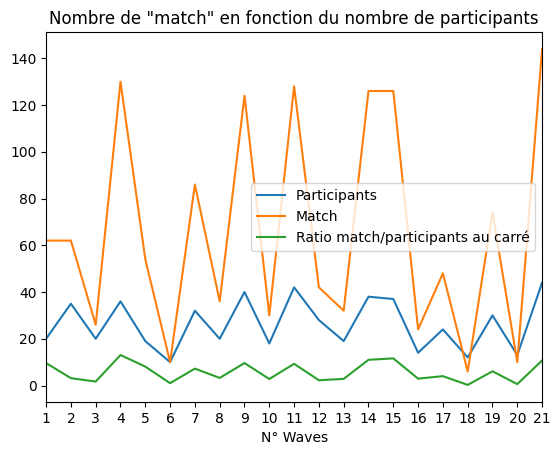

In [ ]:
ax = sns.lineplot(waves, x='wave', y="nb_participants", label="Participants")
sns.lineplot(waves, x='wave', y="nb_match", ax=ax, label="Match")
sns.lineplot(waves, x='wave', y="ratio_match", ax=ax, label="Ratio match/participants au carré") # Je le monte au carré pour démultiplier les variations afin de les comparer (sinon courbe trop flat)
ax.set(xlabel='N° Waves', ylabel='', title='Nombre de "match" en fonction du nombre de participants')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xlim(1,nb_total_waves) # Affiche les valeurs en abscisse de 1 au nombre total de waves (21)



**Analyse par rapport à la notice fournie par Tinder :**
  * La wave #6 est intéressante car c'est la wave qui a eu le moins de participants. On peut émettre l'hypothèse que le nombre de match est étroitement lié au nombre de participants.
  * Les wave #18 et #20 sont en 2e et 3e position du nombre de participants le plus faible.

La notice nous indique que les 4 dernières waves 18 à 21 ont été biaisées volontairement :
 * Les participants aux wave 18 et 21 ont apporté un magazine
 * Les participants aux wave 19 et 20 ont apporté un livre




**Méthodologie suivie par Tinder**

Cela ressemble à un protocole pour mesurer l'impact sur le nombre de match, du livre et du magazine (biais qualitatifs **visibles pendant le speed dating**) par rapport au nombre de participants. Qu'en ressort-il ?
  * Waves #18 et #19 (1e analyse biaisée) :
    * #18 : peu de participants (12) ont apporté un magazine >> Chute du nombre de match
    * #19 : plus de participants (31) mais ont apporté un livre >> Augmentation du nombre de match.

On pourrait penser que le livre génère plus de match. Alors, ils ont inversé les proportions :
  * Waves #20 et #21 (2e analyse biaisée avec inversion des proportions) :
    * #20 : peu de participants (14) ont apporté un livre >> Chute du nombre de match. Donc le livre n'est pas aussi impactant.
    * #21 : plus de participants (44) mais ont apporté un magazine >> Augmentation du nombre de match. Donc le magazine ne réduit pas le nombre de match quand le nombre de participants est plus élevé.

**Conclusions :**
  * Le biais qualitatif visible pendant le speed dating n'augmente pas le nombre de match
  * Le nombre de participants reste a priori le levier d'augmentation du nombre de match. Néanmoins, si on réunit la terre entière (8 milliards de personnes), chacun trouvera son partenaire idéal. La piste de critères qualitatifs reste donc une option.

**Actions : **
* Mieux connaitre les participants, notamment les divergences hommes et femmes dans les variables explicatives
* Analyser les mesures, notamment les préférences des participants et leur impact sur les match

Regardons graphiquement cette distribution pour analyse :
* Il y a un écart
* Hormis la wave n°5, les wave ont une parfaite équité hommes/femmes.

## Traitement du genre dans le dataset
Avant de commencer l'analyse des données par sexe, on va regarder comment est restituée cette colonne.

In [ ]:
sd_participants['gender'].value_counts()

1    277
0    274
Name: gender, dtype: int64

Cette colonne a été préparée pour du machine learning. Cette variable est catégorielle : 0 pour les femmes, 1 pour les hommes.

Nous allons faire des graphiques. Il sera utile d'avoir le sexe en toutes lettres.

In [ ]:
# application de la traduction de gender sur mon dataset sd_participants
sd_participants['gender'] = sd_participants['gender'].apply(lambda x: "Femme" if (x==0)
                                  else "Homme")

# application de la traduction de gender sur mon dataset entier df
df['gender'] = df['gender'].apply(lambda x: "Femme" if (x==0)
                                  else "Homme")

sd_participants['gender'].value_counts()

Homme    277
Femme    274
Name: gender, dtype: int64

## Equilibre quasi-parfait Hommes/Femmes

Répartition hommes/femmes


<Axes: xlabel='gender', ylabel='count'>

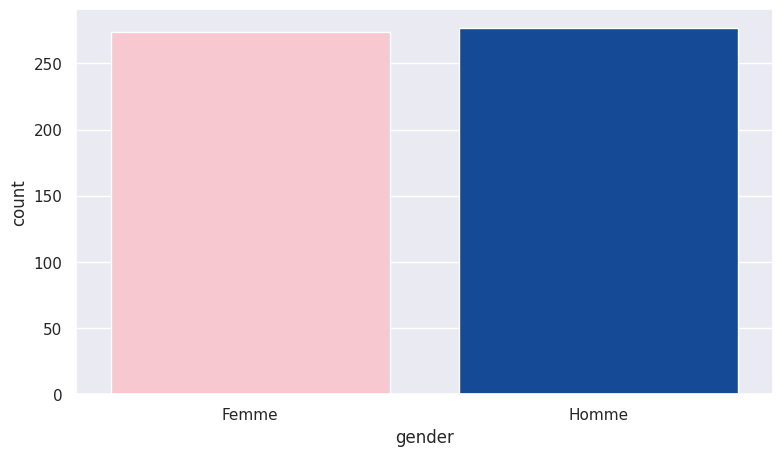

In [ ]:
print("Répartition hommes/femmes")
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(x=sd_participants['gender'], palette=['#FFC0CB', '#0047AB'])

On peut noter un équilibre quasi-parfait entre hommes et femmes. Nous avons vu juste avant qu'il y avait juste 3 hommes de plus que les femmes sur l'ensemble de l'opération.

## Répartition déséquilibrée du sexe par age

La donnée de l'âge n'est pas renseignée partout. Il nous manque 8 données sur une opération de 551 participants.

Juste par curiosité, ce manque concerne-t-il les 2 sexes ?

In [ ]:
total_age_missing = sd_participants['age'].isna().sum()
hommes_age_missing = sd_participants['age'][sd_participants['gender'] == "Homme"].isna().sum()
femmes_age_missing = sd_participants['age'][sd_participants['gender'] == "Femme"].isna().sum()
print(f"Nombre de valeurs age manquantes sur l'ensemble des participants : {total_age_missing}")
print(f"Nombre de valeurs age manquantes chez les hommes : {hommes_age_missing}")
print(f"Nombre de valeurs age manquantes chez les femmes : {femmes_age_missing}")


Nombre de valeurs age manquantes sur l'ensemble des participants : 8
Nombre de valeurs age manquantes chez les hommes : 3
Nombre de valeurs age manquantes chez les femmes : 5


L'écart entre les données manquantes chez les hommes et les femmes n'est pas significatif. Nous pouvons donc les traiter en lots afin de les remplacer par la médiane ou la moyenne.

In [ ]:
# Calcul de l'age médian sur tous, les hommes et les femmes >> Y a-t-il un écart hommes/femmes ?
mediane_age_total = sd_participants['age'].median()
mediane_age_hommes = sd_participants['age'][sd_participants['gender'] == "Homme"].median()
mediane_age_femmes = sd_participants['age'][sd_participants['gender'] == "Femme"].median()

print(f"Age médian sur l'ensemble des participants : {mediane_age_total}")
print(f"Age médian chez les hommes : {mediane_age_hommes}")
print(f"Age médian chez les femmes : {mediane_age_femmes}")
print("--------------------")

# Calcul de l'age moyen sur tous, les hommes et les femmes >> Y a-t-il un écart hommes/femmes ?
avg_age_total = sd_participants['age'].mean()
avg_age_hommes = sd_participants['age'][sd_participants['gender'] == "Homme"].mean()
avg_age_femmes = sd_participants['age'][sd_participants['gender'] == "Femme"].mean()

print(f"Age moyen sur l'ensemble des participants : {avg_age_total}")
print(f"Age moyen chez les hommes : {avg_age_hommes}")
print(f"Age moyen chez les femmes : {avg_age_femmes}")


Age médian sur l'ensemble des participants : 26.0
Age médian chez les hommes : 27.0
Age médian chez les femmes : 26.0
--------------------
Age moyen sur l'ensemble des participants : 26.359116022099446
Age moyen chez les hommes : 26.587591240875913
Age moyen chez les femmes : 26.12639405204461


La médiane et la moyenne sont quasi égaux chez les hommes et les femmes. Remplaçons alors l'ensemble des ages manquants par la médiane. Mais veillons à ce que l'age

Ici, vu le faible écart entre la moyenne et la médiane, on aurait pu automatiquement tout remplacer par la moyenne totale.

Mais, si nous devions recevoir un nouveau dataframe d'analyse, cette méthode en fonction du sexe s'appliquerait à un jeu où la moyenne et la médiane hommes vs. femmes aurait un écart plus important.


In [ ]:
# Remplacer les valeurs nan par la médiane en fonction du sexe
sd_participants['age'] = sd_participants['age'].fillna(sd_participants.groupby("gender")['age'].transform('median'))

# Vérification des nan manquants
total_age_missing = sd_participants['age'].isna().sum()
hommes_age_missing = sd_participants['age'][sd_participants['gender'] == "Homme"].isna().sum()
femmes_age_missing = sd_participants['age'][sd_participants['gender'] == "Femme"].isna().sum()
print(f"Nombre de valeurs age manquantes sur l'ensemble des participants : {total_age_missing}")
print(f"Nombre de valeurs age manquantes chez les hommes : {hommes_age_missing}")
print(f"Nombre de valeurs age manquantes chez les femmes : {femmes_age_missing}")
print()
if total_age_missing == 0:
  print("Résultat : Les valeurs manquantes ont été remplacées.")
  df['age'] = df['age'].fillna(sd_participants.groupby("gender")['age'].transform('median')) # Répercuter aussi cette transformation sur mon df total.
  total_df_age_missing = df['age'].isna().sum()
  if total_df_age_missing ==0:
    print("Résultat : Les valeurs manquantes ont aussi été remplacées dans mon dataset total (df)")

else:
  print("WARNING : Il y a eu un bug dans le remplacement des nan")


Nombre de valeurs age manquantes sur l'ensemble des participants : 0
Nombre de valeurs age manquantes chez les hommes : 0
Nombre de valeurs age manquantes chez les femmes : 0

Résultat : Les valeurs manquantes ont été remplacées.


In [ ]:
# Combien de nan manquants dans la colonne age dans mon dataframe df
total_df_age_missing = df['age'].isna().sum()
print(f"Nombre de valeurs age manquantes sur l'ensemble des participants AVANT traitement : {total_df_age_missing}")

# Remplacer les valeurs nan par la médiane en fonction du sexe
df['age'] = df['age'].fillna(df.groupby("gender")['age'].transform('median'))

# Je refais le calcul des nan manquants après traitement
total_df_age_missing = df['age'].isna().sum()
print(f"Nombre de valeurs age manquantes sur l'ensemble des participants APRES traitement : {total_df_age_missing}")

Nombre de valeurs age manquantes sur l'ensemble des participants AVANT traitement : 87
Nombre de valeurs age manquantes sur l'ensemble des participants APRES traitement : 0


La variable age est une variable catégorielle et non continue. Nous allons donc forcer son type pour les traiter comme des entiers.

In [ ]:
# Type de mes données age. En mesure catégorielle je préfère les forcer en Integer
sd_participants['age'].info()
print("---")
df['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 551 entries, 0 to 8356
Series name: age
Non-Null Count  Dtype  
--------------  -----  
551 non-null    float64
dtypes: float64(1)
memory usage: 24.8 KB
---
<class 'pandas.core.series.Series'>
RangeIndex: 8378 entries, 0 to 8377
Series name: age
Non-Null Count  Dtype  
--------------  -----  
8378 non-null   float64
dtypes: float64(1)
memory usage: 65.6 KB


In [ ]:
# On force le type de age à Integer dans les 2 jeux
sd_participants['age'] = sd_participants['age'].astype(int)
df['age'] = df['age'].astype(int)

# Afficher le type pour savoir si la conversion s'est bien déroulée
sd_participants['age'].info()
df['age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 551 entries, 0 to 8356
Series name: age
Non-Null Count  Dtype
--------------  -----
551 non-null    int64
dtypes: int64(1)
memory usage: 24.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 8378 entries, 0 to 8377
Series name: age
Non-Null Count  Dtype
--------------  -----
8378 non-null   int64
dtypes: int64(1)
memory usage: 65.6 KB


Répartition du sexe par age



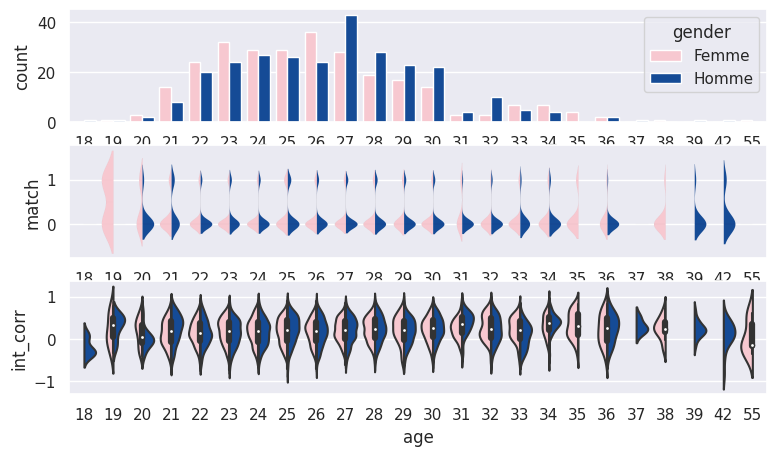

In [ ]:
# Afin de mieux restituer les graphiques, nous allons traiter la colonne
print("Répartition du sexe par age")
print()
fig, ax = plt.subplots(3,1)
sns.set(rc={'figure.figsize':(16,5)})

# Graphique Histogramme de distribution de l'age depuis mon dataframe sd_participants (1 ligne = 1 participant)
graph_1 = sns.countplot(x=sd_participants['age'], hue=sd_participants['gender'], palette=['#FFC0CB', '#0047AB'], ax=ax[0])
#graph_1.get_legend().remove()

# Graphiques Violin s'appliquant à l'intégralité de mon dataframe df
graph_2 = sns.violinplot(data=df, x='age', y='match', hue='gender', palette=['#FFC0CB', '#0047AB'], split=True, ax=ax[1], inner="quart", linewidth=0.01)
graph_2.get_legend().remove()

graph_3 = sns.violinplot(data=df, x='age', y='int_corr', hue='gender', palette=['#FFC0CB', '#0047AB'], split=True, ax=ax[2])
graph_3.get_legend().remove()
plt.show()


On peut déjà noter un certain nombre d'enseignements


*   Le plus jeune participant a 18 ans et c'est un garçon
*   Le participant le plus agé est une femme de 55 ans
*   Le coeur de cible va de 20 à 35 ans
*   Entre les deux, on peut observer des déséquilibres dans la répartition
  * De 20 à 26 ans, les femmes sont plus nombreuses que les hommes
  * De 27 à 32 ans, les hommes sont plus nombreux que les femmes
  * De 33 à 36 ans, les femmes sont plus nombreuses

Sur le plan des match, on voit :
* une prédominance du succès (match=1) chez les femmes entre 19 (1 femme) et 20 ans
* une faible prédominance du succès (match=1) chez les hommes 21 et 30 ans
* Sur l'ensemble, entre 22 et 34 ans, on retrouve la même proportion d'age qui matchent entre les hommes et les femmes

Comparons avec le taux de correlation fourni par Tinder (int_corr) basé sur les réponses au questionnaire rempli avant le Speed dating :
* Les hommes ont un taux de corrélation positif hormis les mesures exceptionnelles à 18 ans et 20 ans où ils sont moins "compatibles". Autrement, les hommes sont compatibles avec les femmes (int_corr>0)
* Les femmes sont moins compatibles entre 19 et 21 ans. La correlation (int_corr) est plus importante à partir de 22 ans.



## Des hommes de formation plus Business, plus sciences sociales pour les femmes
La formation peut donner une indication sur le profilage des participants.

En effet, on voit que la formation des hommes et des femmes sont assez différentes :
* Les domaines de formation chez les hommes sont plutot orientés Business.
* Les domaines de formation chez les femmes sont plutot orientés Sciences (sociales ou techniques)
* Il y a une disparité dans le background académique entre les hommes et les femmes, en termes de domaine.  

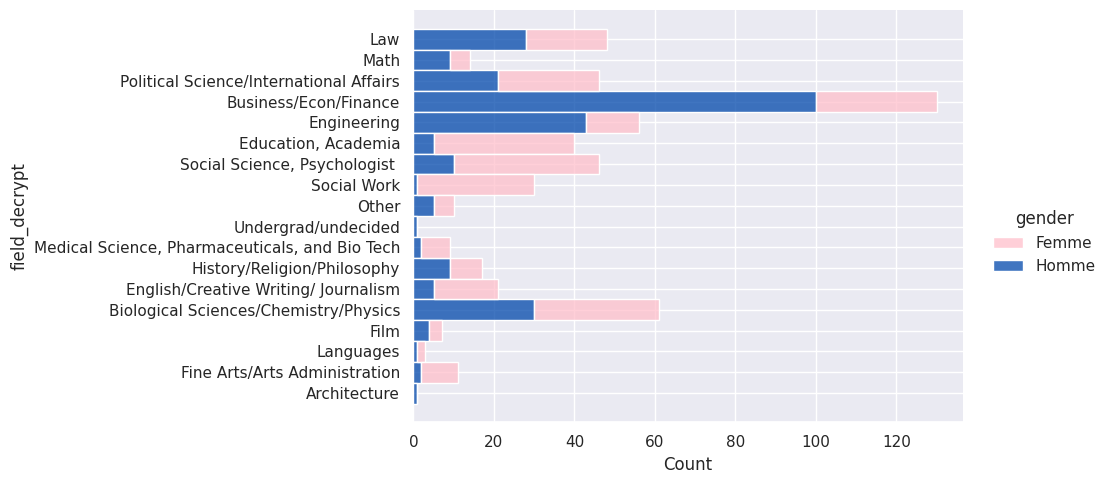

In [ ]:
# Pour l'analyse, nous allons travailler sur le dataframe sd_participants qui comprend 1 ligne = 1 participant
sd_participants['field_decrypt'] = sd_participants['field_cd'].apply(lambda x:
                                                "Law" if x==1
                                                else "Math" if x==2
                                                else "Social Science, Psychologist " if x==3
                                                else "Medical Science, Pharmaceuticals, and Bio Tech" if x==4
                                                else "Engineering" if x==5
                                                else "English/Creative Writing/ Journalism" if x==6
                                                else "History/Religion/Philosophy" if x==7
                                                else "Business/Econ/Finance" if x==8
                                                else "Education, Academia" if x==9
                                                else "Biological Sciences/Chemistry/Physics" if x==10
                                                else "Social Work" if x==11
                                                else "Undergrad/undecided" if x==12
                                                else "Political Science/International Affairs" if x==13
                                                else "Film" if x==14
                                                else "Fine Arts/Arts Administration" if x==15
                                                else "Languages" if x==16
                                                else "Architecture" if x==17
                                                else "Other"
                                                )

# Distribution de la formation par sexe
sns.displot(data=sd_participants, y='field_decrypt', hue='gender', aspect=2, palette=['#FFC0CB', '#0047AB'], multiple="stack")
plt.show()

## A-t-on une représentativité équivalente des métiers en fonction du sexe ?

Afin de savoir si les hommes et les femmes ont les mêmes profils, on va observer la distribution des métiers par sexe.

Au niveau des métiers, les proportions sont plus homogènes entre les hommes et les femmes.

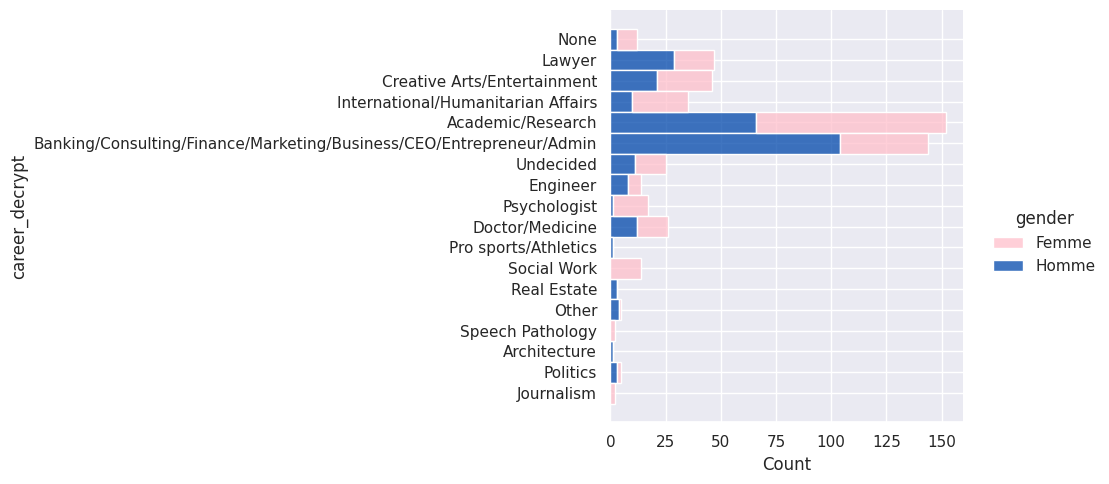

In [ ]:
# Décodage de la colonne career_c
sd_participants['career_decrypt'] = sd_participants['career_c'].apply(lambda x:
                                                "Lawyer" if x==1
                                                else "Academic/Research" if x==2
                                                else "Psychologist" if x==3
                                                else "Doctor/Medicine" if x==4
                                                else "Engineer" if x==5
                                                else "Creative Arts/Entertainment" if x==6
                                                else "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin" if x==7
                                                else "Real Estate" if x==8
                                                else "International/Humanitarian Affairs" if x==9
                                                else "Undecided" if x==10
                                                else "Social Work" if x==11
                                                else "Speech Pathology" if x==12
                                                else "Politics" if x==13
                                                else "Pro sports/Athletics" if x==14
                                                else "Other" if x==15
                                                else "Journalism" if x==16
                                                else "Architecture" if x==17
                                                else "None"
                                                )

# Distribution des métiers par sexe
sns.displot(data=sd_participants, y='career_decrypt', hue='gender', aspect=2, palette=['#FFC0CB', '#0047AB'], multiple="stack")
plt.show()

### Métiers des hommes
Les hommes travaillent dans des domaines plus Business et techniques.

### Métiers des femmes
Les femmes travaillent dans d'autres domaines qui n'ont, a priori, rien en commun à l'exception des domaines Business (law, business, international affairs,

## Les revenus des participants
Cette partie devient interessante parce que l'on trouve dans les données de revenus une indication de la CSP des participants.

Tout d'abord, nous devons adopter une stratégie pour traiter les nan.

In [ ]:
# Combien de valeurs manquantes dans la colonne income ?
nb_income_nan = sd_participants['income'].isna().sum()
nb_income = sd_participants.shape[0]
print(f'Il y a {nb_income_nan} valeurs manquantes sur les {nb_income} participants ')

Il y a 270 valeurs manquantes sur les 551 participants 


In [ ]:
# Remplacer les valeurs nan par la médiane en fonction du sexe
df['income'] = df['income'].fillna(df.groupby("gender")['income'].transform('median'))
sd_participants['income'] = sd_participants['income'].fillna(sd_participants.groupby("gender")['income'].transform('median'))


In [ ]:
# APRES : Combien de valeurs manquantes dans la colonne income ?
nb_income_nan = sd_participants['income'].isna().sum()
nb_income = sd_participants.shape[0]
print(f'Il y a {nb_income_nan} valeurs manquantes sur les {nb_income} participants ')

Il y a 0 valeurs manquantes sur les 551 participants 


In [ ]:
income = sd_participants['income'].astype(float)
income_total = income.sum().astype(int)
print(f"Le revenu total de tous les participants représente : {income_total}$.")
print()
print('---')
print()
income_h = sd_participants[sd_participants['gender'] == 'Homme']['income'].dropna().astype(float)
income_h_total = income_h.sum().astype(int)
income_h_moyenne = income_h.mean().astype(int)
income_h_ecart_type = income_h.median().astype(int)
print(f"Le revenu total des hommes représente : {income_h_total}$")
print(f"Le revenu moyen des hommes représente : {income_h_moyenne}$")
print(f"Le revenu médian des hommes représente : {income_h_ecart_type}$")
print()
print('---')
print()
income_f = sd_participants[sd_participants['gender'] == 'Femme']['income'].dropna().astype(float)
income_f_total = income_f.sum().round(2)
income_f_moyenne = income_f.mean().round(2).astype(int)
income_f_ecart_type = income_f.median().astype(int)
print(f"Le revenu total des femmes représente : {income_f_total}$")
print(f"Le revenu moyen des femmes représente : {income_f_moyenne}$")
print(f"Le revenu médian des femmes représente : {income_f_ecart_type}$")

Le revenu total de tous les participants représente : 24633468$.

---

Le revenu total des hommes représente : 12614455$
Le revenu moyen des hommes représente : 45539$
Le revenu médian des hommes représente : 45158$

---

Le revenu total des femmes représente : 12019013.0$
Le revenu moyen des femmes représente : 43865$
Le revenu médian des femmes représente : 42640$


Il s'agit de relativiser la précision de ces chiffres. En effet, ceux-ci ont été estimés d'après des données, incluant le code postal d'habitation, et uniquement pour les américains qui l'ont indiqué.

Néanmoins, on remarque sur le graphique ci-dessous que les revenus des personnes qui ont des match varient entre 20000 et 60000$. Il varie légèrement d'une wave à l'autre.

C'est surtout à partir de la wave #16 que l'on constate une différence notable de densité avec un revenu plus important chez ceux qui ont reçu un match.

<Axes: xlabel='wave', ylabel='income'>

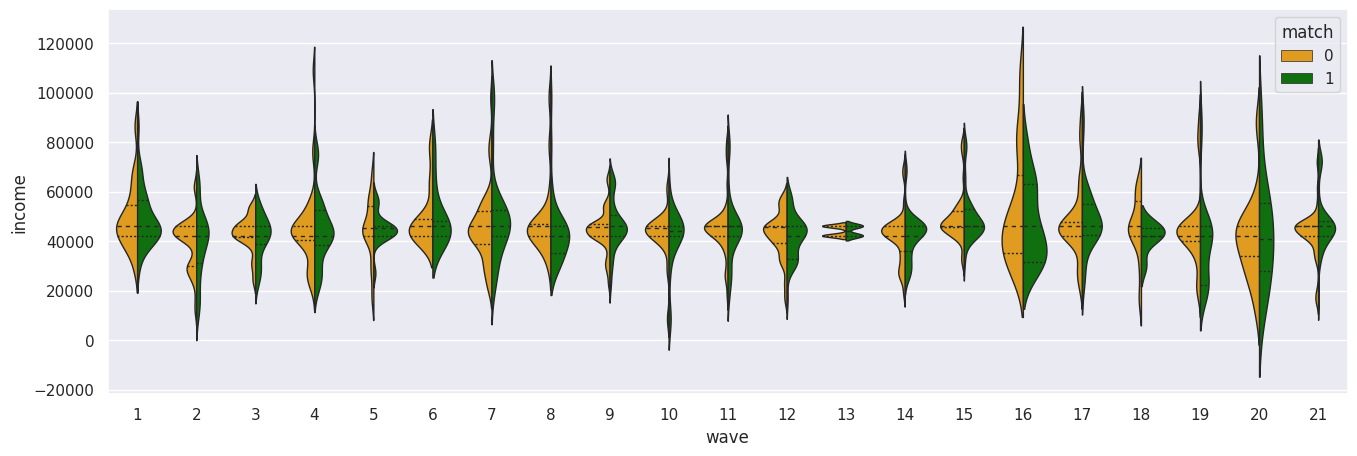

In [ ]:
sns.set_palette(['blue', 'red'])
sns.violinplot(df, x="wave", y="income", col="gender", hue='match', palette=['orange', 'green'], split=True, inner="quart", linewidth=1)

On remarque une anomalie à la Wave 13. Il y a bien eu des matchs (cf. graph précédent). Mais nous n'avons pas du tout les revenus estimés pour cette wave.

In [ ]:
# Il s'est passé quelque chose dans la wave 13
print("Combien de revenus indiqués pour la wave n°13 ?")
print(df['income'][df['wave'] == 13].sum()) # Il n'y a effectivement pas de revenus estimés pour cette wave
print()
# Explication : income est estimée pour les américains ayant indiqué leur code postal.
print("Des américains figurent pourtant bien dans cette liste :")
df['from'][df['wave'] == 13].value_counts() # Pas de revenus estimés pour cette wave


Combien de revenus indiqués pour la wave n°13 ?
7952670.0

Des américains figurent pourtant bien dans cette liste :


Bombay, India                 10
Dallas, Texas                 10
Miami                         10
Michigan                      10
New York/South Korea/Japan    10
Portland, OR                  10
japan                         10
New Jersey                     9
Tokyo and Texas                9
Taiwan                         9
Great Neck, NY                 9
NYC                            9
USA/American                   9
Westchester, new York          9
New York                       9
Erie, PA                       9
California (West Coast)        9
Name: from, dtype: int64

## Origine des participants
Les revenus ont été estimés par Tinder sur la base du code postal. Il ne peut donc pas y avoir d'omission ou bien de secret sur cette variable explicative.

Nous avons des participants provenant du monde entier. Sachant qu'il manque beaucoup de données, on peut confirmer que les données manquantes sont dues aux origines non-américaines.

La répartition ci-dessous nous confirme ce principe.



In [ ]:
income_missing = sd_participants[sd_participants['income'].isna()]
income_missing['from'].value_counts()


Series([], Name: from, dtype: int64)

# Les différents questionnaires de l'opération
L'objectif est désormais de rechercher des corrélations entre les match et les préférences/perceptions des participants.


## Questionnaire 1 : sd_time1

Contenu : toutes les colonnes correspondant aux données des participants et du questionnaire + la variable Target

In [ ]:
sd_time1 = pd.DataFrame() # 2e groupe de data : Signup/Time1 >> Description des participants
sd_time1_id = df.iloc[:, 0]  # Cible la colonne iid
sd_time1_gender = df.iloc[:, 2]  # Cible la colonne gender
sd_time1_reponses = df.iloc[:, 33:97] # Cible les réponses au questionnaire
sd_time1_target = df['match']  # Cible la colonne match
sd_time1 = pd.concat([sd_time1_id, sd_time1_gender, sd_time1_reponses, sd_time1_target], axis=1)  #axis=1 pour conserver le label iid


In [ ]:
sd_time1.columns

Index(['iid', 'gender', 'age', 'field', 'field_cd', 'undergra', 'mn_sat',
       'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income',
       'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1',
       'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1',
       'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1',
       'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1',
       'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1',
       'amb5_1', 'match'],
      dtype='object')

### Correlations entre les infos Signup (Time1) et la variable Target
* Pas de corrélation entre la target match et les réponses aux 20 premières questions


### 20 premières questions : description du background et des centres d'intérêt
Il n'y a pas de corrélation entre les réponses et la variable Target.

In [ ]:
# sd_time1_infos regroupe les réponses aux 20 premières questions, uniquement les premières colonnes jusqu'à expnum
sd_time1_infos = sd_time1.iloc[:, 0:38]
sd_time1_dec = df.iloc[:, 97:98]
sd_time1_infos = pd.concat([sd_time1_infos, sd_time1_target, sd_time1_dec], axis=1)  #axis=1 pour conserver le label iid
sd_time1_infos.columns

Index(['iid', 'gender', 'age', 'field', 'field_cd', 'undergra', 'mn_sat',
       'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income',
       'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'expnum', 'match', 'dec'],
      dtype='object')

<ipython-input-41-1c3564b9a23e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sd_time1_infos_corr = sd_time1_infos.corr()


<Axes: >

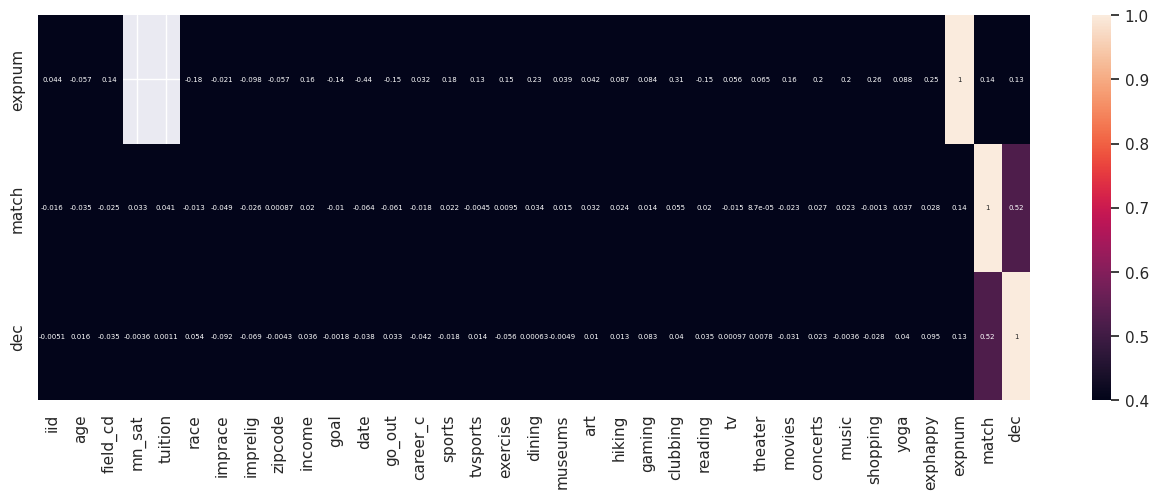

In [ ]:
# corrélations sur les infos descriptives
sd_time1_infos_corr = sd_time1_infos.corr()
sd_time1_infos_corr = sd_time1_infos_corr[sd_time1_infos_corr['match'] > 0.1]
sns.heatmap(sd_time1_infos_corr, vmin=0.4, vmax=1, annot=True, annot_kws={"size":5})



### Les 20 questions suivantes : perceptions et attentes
Il n'y a pas de corrélation entre les réponses et la variable Target.

In [ ]:
# Les questions montrent les attentes et la perception des prétendants et de soi-meme
# Réponses aux questions :
# 1_x : We want to know what you look for in the opposite sex.
# 4_x : Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.
# 2_x : What do you think the opposite sex looks for in a date?
# 3_x : How do you think you measure up?
# 5_x : And finally, how do you think others perceive you?
sd_time1_looking = sd_time1.iloc[:, 38:]
sd_time1_dec = df.iloc[:, 97:98]
sd_time1_looking = pd.concat([sd_time1_looking, sd_time1_dec], axis=1)  #axis=1 pour conserver le label iid
sd_time1_looking.columns

Index(['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
       'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1',
       'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'match', 'dec'],
      dtype='object')

<Axes: >

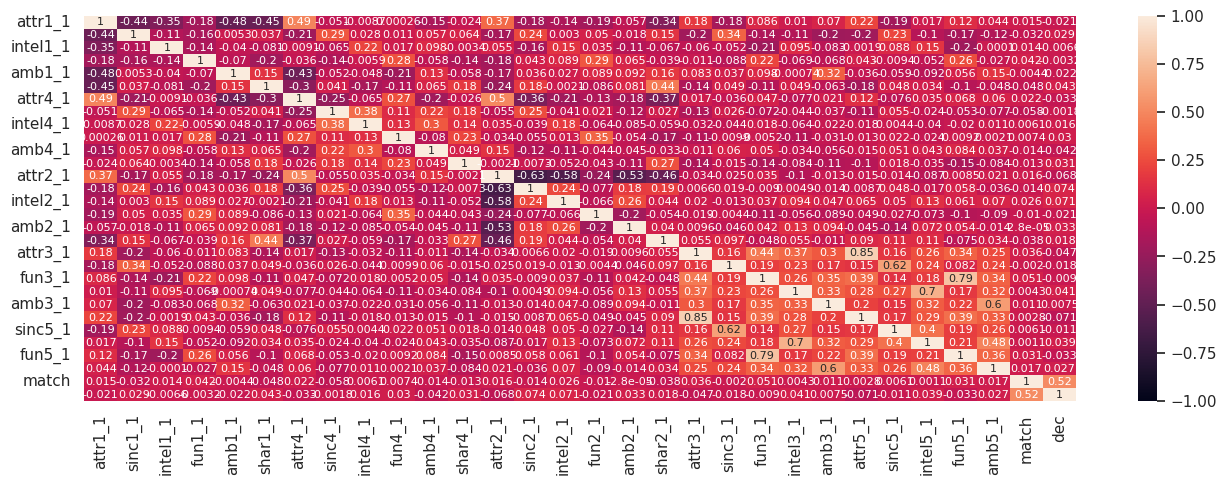

In [ ]:
# corrélations sur les infos descriptives
sd_time1_looking_corr = sd_time1_looking.corr()
sns.heatmap(sd_time1_looking_corr, vmin=-1, vmax=1, annot=True, annot_kws={"size":8})

## Questionnaire 2 : Scorecard
Correlations entre les notations Scorecard et la variable Target
Les résultats commencent à être intéressants car les corrélations sont plus évidentes que sur les infos Signup/Time 1.

Les variables ayant un impact sur le match sont les suivantes :
1. dec (0.52) : il s'agit de la décision prise de revoir le candidat. On va y revenir ci-dessous.
2. like (0.31) : Est-ce que la personne apprécie le candidat ?
3. fun (0.28) : Est-ce que le candidat est drôle ?
4. shar (0.27) : Les centres d'intérêt en commun
5. attr (0.26) : Le candidat est-il séduisant ?
6. prob (0.26) : Est-il probable de revoir ce candidat par la suite ?

Maintenant, nous pouvons également détecter la corrélation entre les variables et la décision (dec) :
1. like (0.51) : Est-ce que la personne apprécie le candidat ?
2. attr (0.49) : Le candidat est-il séduisant ?
3. fun (0.41) : Est-ce que le candidat est drôle ?
4. shar (0.4) : Les centres d'intérêt en commun

Conclusions :
* Les variables explicatives des match et de la décision sont quasi-identiques en termes d'importance. C'est l'expérience avec le candidat qui va grandement déterminer le match. A noter que la beauté, a priori un critère important, n'arrive qu'après l'humour et le caractère sociable du candidat.


In [ ]:
# Création d'un dataframe regroupant les notations des participants dans la Scorecard
sd_scorecard = df.iloc[:, 97:108] # 2e groupe de data : SCORECARD >> Notation de chaque tour de table (wave)
sd_scorecard_target = df['match']
sd_scorecard = pd.concat([sd_scorecard, sd_scorecard_target], axis=1)  #axis=1 pour conserver le label iid
sd_scorecard.columns

Index(['dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met', 'match_es', 'match'],
      dtype='object')

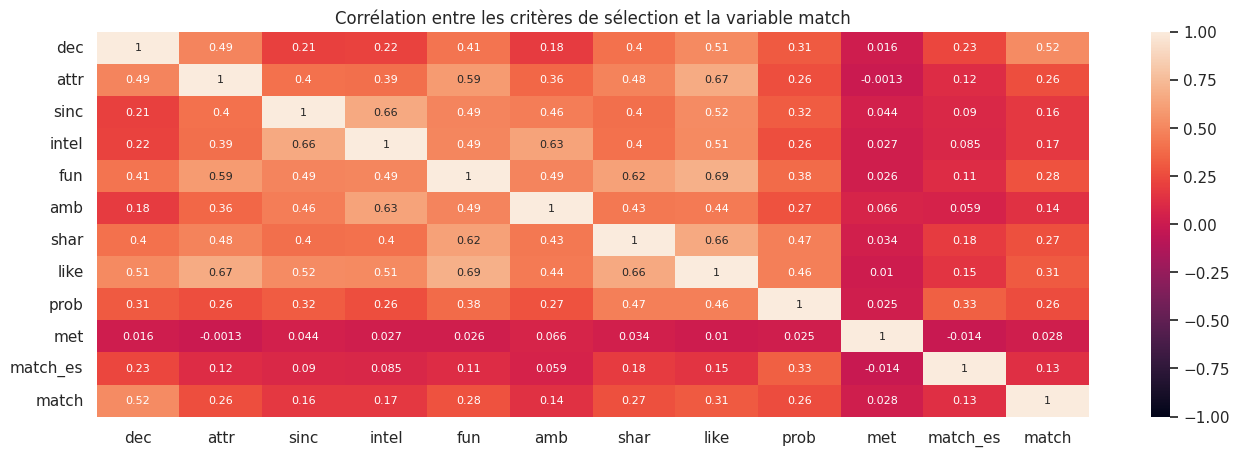

In [ ]:
# corrélations sur les notations dans la scorecard
sd_scorecard_corr = sd_scorecard.corr()
sns.heatmap(sd_scorecard_corr, vmin=-1, vmax=1, annot=True, annot_kws={"size":8})
plt.title('Corrélation entre les critères de sélection et la variable match')
print()

## Halfway : questionnaire soumis durant la soirée de speed dating
Ces données doivent a priori nous montrer les éventuelles évolutions intervenues durant la soirée :
* Aucune corrélation détectée avec la variable Target


In [ ]:
sd_halfway = df.iloc[:, 108:119]  # 3e groupe de data : HALFWAY >> Notation à mi-parcours
sd_halfway_target = df['match']
sd_halfway_dec = df.iloc[:, 97:98]
sd_halfway = pd.concat([sd_halfway, sd_halfway_target, sd_halfway_dec], axis=1)
sd_halfway.columns

Index(['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
       'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'match', 'dec'],
      dtype='object')

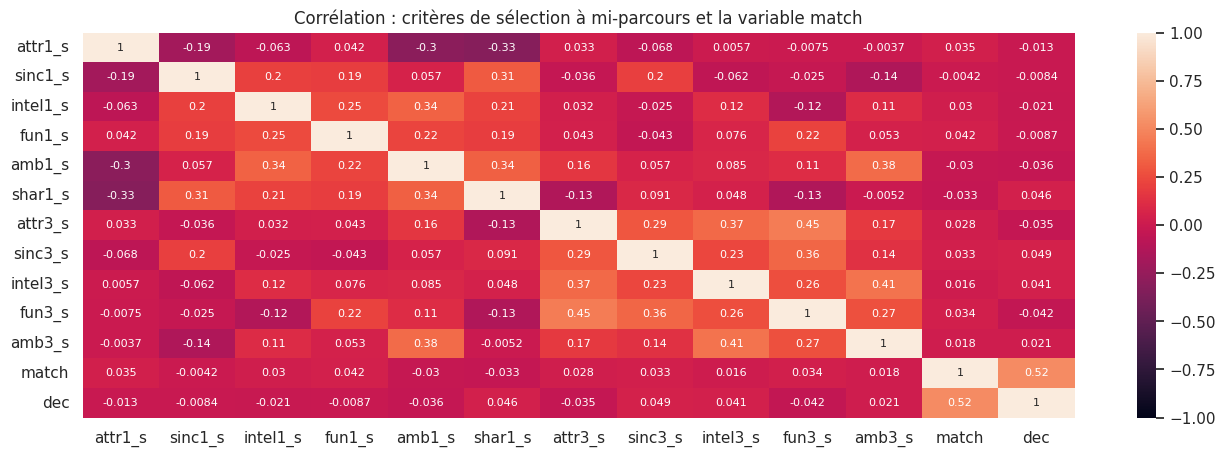

In [ ]:
# corrélations sur les infos descriptives
sd_halfway_corr = sd_halfway.corr()
sns.heatmap(sd_halfway_corr, vmin=-1, vmax=1, annot=True, annot_kws={"size":8})
plt.title('Corrélation : critères de sélection à mi-parcours et la variable match')
print()

Il n'y a aucune corrélation détectée avec la variable Target.

Néanmoins, nous pouvons mesurer les évolutions de perceptions entre le début et la moitié de la soirée.


       

## Evolution des critères de recherche entre avant la soirée et à la moitié de la soirée :
Classement des critères dans l'ordre d'importance :

>> AVANT (matrice de corrélation questionnaire Scorecard)
1. beauté,
2. intelligence,
3. humour,
4. sincérité,
5. points communs,
6. ambition

>> PENDANT (matrice de corrélation questionnaire Halfway)
1. beauté,
2. intelligence,
3. **sincérité**,
4. **humour**,
5. points communs,
6. ambition

Conclusions :
* Les participants ont augmenté l'importance de la sincérité devant l'humour. On peut imaginer qu'à mi-parcours, les participants cherchaient plus de sincérité chez les candidats.
* Ces 2 critères ont évolué durant le speed dating.
Les nan nous indiquent des proportions aussi. Interprétation des nan

In [ ]:
df['attr1_1'].notna().sum()

8299

In [ ]:
# Critères recherchés avant et pendant
# Au lieu de traquer les nan, je traque les not nan (notna())

# Beauté
attractive_avant = df['attr1_1'].sum()
attractive_pendant = df['attr1_s'].sum()
attractive_variation = (((attractive_pendant - attractive_avant) / attractive_avant) * 100)
print(f"Recherche de la beauté")
print(f"Points avant : {attractive_avant.round(2)} / Points pendant : {attractive_pendant.round(2)} / Variation du nombre de points {attractive_variation.round(2)} %")
attractive_ok_avant = df['attr1_1'].notna().sum()
attractive_ok_pendant = df['attr1_s'].notna().sum()
attractive_ok_variation = attractive_ok_pendant - attractive_ok_avant
print(f"Critère Avant : {attractive_ok_avant} / Critère Pendant : {attractive_ok_pendant} / Variation du critère Beauté {attractive_ok_variation}")
print()

# Intelligence
intelligence_avant = df['intel1_1'].sum()
intelligence_pendant = df['intel1_s'].sum()
intelligence_variation = intelligence_pendant - intelligence_avant
print(f"Recherche de l'intelligence'")
print(f"Avant : {intelligence_avant} / Pendant : {intelligence_pendant} / Variation de {intelligence_variation}")
intelligence_ok_avant = df['intel1_1'].notna().sum()
intelligence_ok_pendant = df['intel1_s'].notna().sum()
intelligence_ok_variation = intelligence_ok_pendant - intelligence_ok_avant
print(f"Critère Avant : {intelligence_ok_avant} / Critère Pendant : {intelligence_ok_pendant} / Variation du critère Intelligence {intelligence_ok_variation}")
print()

# Sens de l'humour
fun_avant = df['fun1_1'].sum()
fun_pendant = df['fun1_s'].sum()
fun_variation = fun_pendant - fun_avant
print(f"Recherche de l'humour")
print(f"Avant : {fun_avant} / Pendant : {fun_pendant} / Variation de {fun_variation}")
fun_ok_avant = df['fun1_1'].notna().sum()
fun_ok_pendant = df['fun1_s'].notna().sum()
fun_ok_variation = fun_ok_pendant - fun_ok_avant
print(f"Critère Avant : {fun_ok_avant} / Critère Pendant : {fun_ok_pendant} / Variation du critère Humour {fun_ok_variation}")
print()

# Sincérité
sincere_avant = df['sinc1_1'].sum()
sincere_pendant = df['sinc1_s'].sum()
sincere_variation = sincere_pendant - sincere_avant
print(f"Recherche de la sincérité")
print(f"Avant : {sincere_avant} / Pendant : {sincere_pendant} / Variation de {sincere_variation}")
sincere_ok_avant = df['sinc1_1'].notna().sum()
sincere_ok_pendant = df['sinc1_s'].notna().sum()
sincere_ok_variation = sincere_ok_pendant - sincere_ok_avant
print(f"Critère Avant : {sincere_ok_avant} / Critère Pendant : {sincere_ok_pendant} / Variation du critère Sincérité {sincere_ok_variation}")
print()

# Ambition
amb_avant = df['amb1_1'].sum()
amb_pendant = df['amb1_s'].sum()
amb_variation = amb_pendant - amb_avant
print(f"Recherche de l'ambition")
print(f"Avant : {amb_avant} / Pendant : {amb_pendant} / Variation de {amb_variation}")
amb_ok_avant = df['amb1_1'].notna().sum()
amb_ok_pendant = df['amb1_s'].notna().sum()
amb_ok_variation = amb_ok_pendant - amb_ok_avant
print(f"Critère Avant : {amb_ok_avant} / Critère Pendant : {amb_ok_pendant} / Variation du critère Ambition {amb_ok_variation}")
print()

# Points communs
shar_avant = df['shar1_1'].sum()
shar_pendant = df['shar1_s'].sum()
shar_variation = shar_pendant - shar_avant
print(f"Recherche des points communs")
print(f"Avant : {shar_avant} / Pendant : {shar_pendant} / Variation de {shar_variation}")
shar_ok_avant = df['shar1_1'].notna().sum()
shar_ok_pendant = df['shar1_s'].notna().sum()
shar_ok_variation = shar_ok_pendant - shar_ok_avant
print(f"Critère Avant : {shar_ok_avant} / Critère Pendant : {shar_ok_pendant} / Variation du critère Points communs {shar_ok_variation}")
print()

Recherche de la beauté
Points avant : 186848.93 / Points pendant : 85162.49 / Variation du nombre de points -54.42 %
Critère Avant : 8299 / Critère Pendant : 4096 / Variation du critère Beauté -4203

Recherche de l'intelligence'
Avant : 168184.32 / Pendant : 70630.23000000001 / Variation de -97554.09
Critère Avant : 8299 / Critère Pendant : 4096 / Variation du critère Intelligence -4203

Recherche de l'humour
Avant : 144701.43 / Pendant : 62508.520000000004 / Variation de -82192.90999999999
Critère Avant : 8289 / Critère Pendant : 4096 / Variation du critère Humour -4193

Recherche de la sincérité
Avant : 144372.63 / Pendant : 63218.71 / Variation de -81153.92000000001
Critère Avant : 8299 / Critère Pendant : 4096 / Variation du critère Sincérité -4203

Recherche de l'ambition
Avant : 88440.74 / Pendant : 45648.36 / Variation de -42792.380000000005
Critère Avant : 8279 / Critère Pendant : 4096 / Variation du critère Ambition -4183

Recherche des points communs
Avant : 97805.08 / Pendan

## Comparaison sur l'auto-notation entre avant et pendant
Question : # 3_x : How do you think you measure up?

## Evolution du sujet sur ses propres qualités entre avant la soirée et à la moitié de la soirée :
Classement des qualités propres, dans l'ordre d'importance avant :

>> AVANT (matrice de corrélation questionnaire Scorecard)
1. intelligent
2. sincère
3. drôle
4. ambitieux
5. beau

>> PENDANT (matrice de corrélation questionnaire Halfway)
1. intelligent
2. sincère
3. drôle
4. beau
5. ambitieux

Conclusion :
* Les participants ont revu à la hausse la perception de leur beauté et revu à la baisse la perception de leur ambition.
* Les candidats rencontrés à mi-parcours leur a donné une meilleure perception de leur beauté qu'au début. Est-ce que les candidats étaient moins beaux qu'eux ?

In [ ]:
# Notation du sujet sur ses propres qualités
# Rappel : 4 temps dans l'opération, 4 formulaires (inscription, halfway, time2, time3)


# Beauté
print(f"Le sujet se trouve beau/belle ?")
physique_inscription = int(df['attr3_1'].sum())
physique_halfway = int(df['attr3_s'].sum())
physique_time2 = int(df['attr3_2'].sum())
physique_time3 = int(df['attr3_3'].sum())
print(f'Inscription : {physique_inscription}')
print(f'Halfway : {physique_halfway}')
print(f'Time 2 : {physique_time2}')
print(f'Time 3 : {physique_time3}')
print('---')


# Sincérité
sincere_avant = df['sinc3_1'].sum()
sincere_pendant = df['sinc3_s'].sum()
sincere_variation = sincere_pendant - sincere_avant
print(f"Le sujet se trouve sincère")
print(f"Avant : {sincere_avant} / Pendant : {sincere_pendant} / Variation de {sincere_variation}")
print()

# Intelligence
intelligence_avant = df['intel3_1'].sum()
intelligence_pendant = df['intel3_s'].sum()
intelligence_variation = intelligence_pendant - intelligence_avant
print(f"Le sujet se trouve intelligent")
print(f"Avant : {intelligence_avant} / Pendant : {intelligence_pendant} / Variation de {intelligence_variation}")
print()

# Sens de l'humour
fun_avant = df['fun3_1'].sum()
fun_pendant = df['fun3_s'].sum()
fun_variation = fun_pendant - fun_avant
print(f"Le sujet se trouve drôle")
print(f"Avant : {fun_avant} / Pendant : {fun_pendant} / Variation de {fun_variation}")
print()

# Ambition
amb_avant = df['amb3_1'].sum()
amb_pendant = df['amb3_s'].sum()
amb_variation = amb_pendant - amb_avant
print(f"Le sujet se trouve ambitieux")
print(f"Avant : {amb_avant} / Pendant : {amb_pendant} / Variation de {amb_variation}")
print()



Le sujet se trouve beau/belle ?
Inscription : 58612
Halfway : 28845
Time 2 : 53176
Time 3 : 28773
---
Le sujet se trouve sincère
Avant : 68624.0 / Pendant : 32328.0 / Variation de -36296.0

Le sujet se trouve intelligent
Avant : 69526.0 / Pendant : 33031.0 / Variation de -36495.0

Le sujet se trouve drôle
Avant : 63739.0 / Pendant : 30770.0 / Variation de -32969.0

Le sujet se trouve ambitieux
Avant : 62696.0 / Pendant : 30357.0 / Variation de -32339.0



## Time 2 : Questions posées le lendemain de l'évènement
Les corrélations sont toujours très faibles entre les réponses au questionnaire et la variable Target.

In [ ]:
sd_time2 = df.iloc[:, 119:156]  # 4e groupe de data : Time 2
sd_time2_target = df['match']
sd_time2_dec = df.iloc[:, 97:98]
sd_time2 = pd.concat([sd_time2, sd_time2_target, sd_time2_dec], axis=1)
sd_time2.columns


Index(['satis_2', 'length', 'numdat_2', 'attr7_2', 'sinc7_2', 'intel7_2',
       'fun7_2', 'amb7_2', 'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2',
       'fun1_2', 'amb1_2', 'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2',
       'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2',
       'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2',
       'fun3_2', 'amb3_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2',
       'amb5_2', 'match', 'dec'],
      dtype='object')

In [ ]:
# corrélations sur les infos descriptives avec les variables match et dec
sd_time2_corr = sd_time2.corr()
fig = plt.figure(figsize=(36,36), dpi=480)
sns.heatmap(sd_time2_corr, vmin=-1, vmax=1, annot=True, annot_kws={"size":8})
print()

Output hidden; open in https://colab.research.google.com to view.

## Time3 : Questionnaire soumis 3 à 4 semaines après le speed dating

In [ ]:
sd_time3 = df.iloc[:, 156:195]  # 2e groupe de data : Time 3
sd_time3_target = df['match']
sd_time3 = pd.concat([sd_time3, sd_time3_target], axis=1)
sd_time3.columns

Index(['you_call', 'them_cal', 'date_3', 'numdat_3', 'num_in_3', 'attr1_3',
       'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr7_3',
       'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3',
       'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3',
       'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3',
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3',
       'intel5_3', 'fun5_3', 'amb5_3', 'match'],
      dtype='object')

<Axes: >

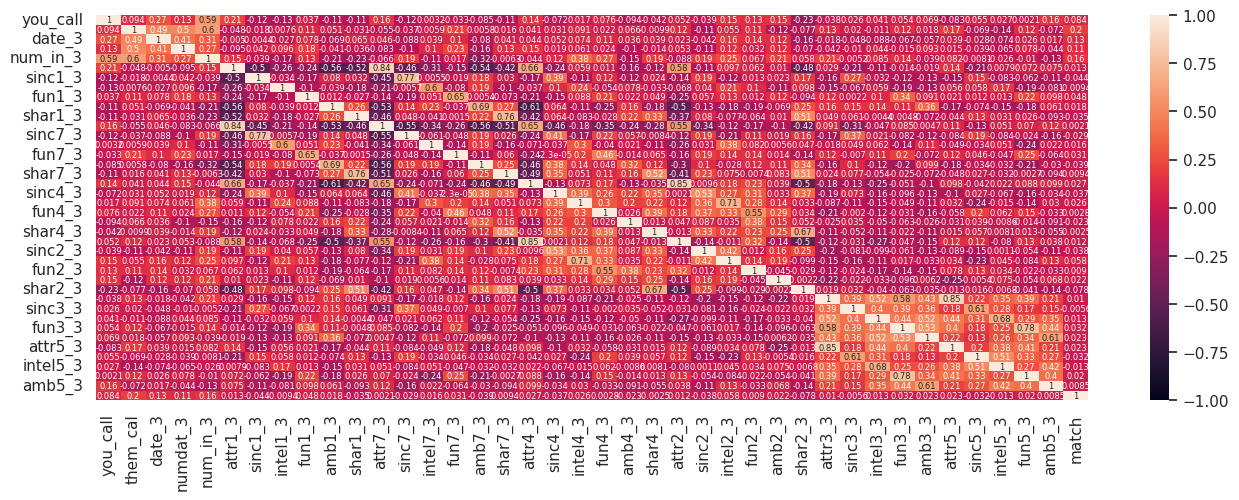

In [ ]:
# corrélations sur les infos descriptives
sd_time3_corr = sd_time3.corr()
sns.heatmap(sd_time3_corr, vmin=-1, vmax=1, annot=True, annot_kws={"size":6})

# Analyse des "*match*"

Corrélations les plus élevées avec la variable *match*


## Critères de sélection et match

### Critères de sélection des femmes/hommes impactant le plus le match et la décision dec

Tous sexes confondus, les critères ayant le plus d'impact sur les match sont les suivants :


1.   match       1.000000
2.   dec_o       0.522326
3.   dec         0.521943
4. like_o      0.305853
5. like        0.305723
6. fun_o       0.277700
7. fun         0.277545
8. shar_o      0.270840
9. shar        0.270679
10. attr_o      0.260837
11. attr        0.260676
12. prob_o      0.255574
13. prob        0.255531
14. them_cal    0.202762
15. intel       0.169532
16. intel_o     0.169448
17. sinc_o      0.164523
18. sinc        0.164449
19. num_in_3    0.156042



match       1.000000
dec_o       0.522326
dec         0.521943
like_o      0.305853
like        0.305723
fun_o       0.277700
fun         0.277545
shar_o      0.270840
shar        0.270679
attr_o      0.260837
attr        0.260676
prob_o      0.255574
prob        0.255531
them_cal    0.202762
intel       0.169532
intel_o     0.169448
sinc_o      0.164523
sinc        0.164449
Name: match, dtype: float64


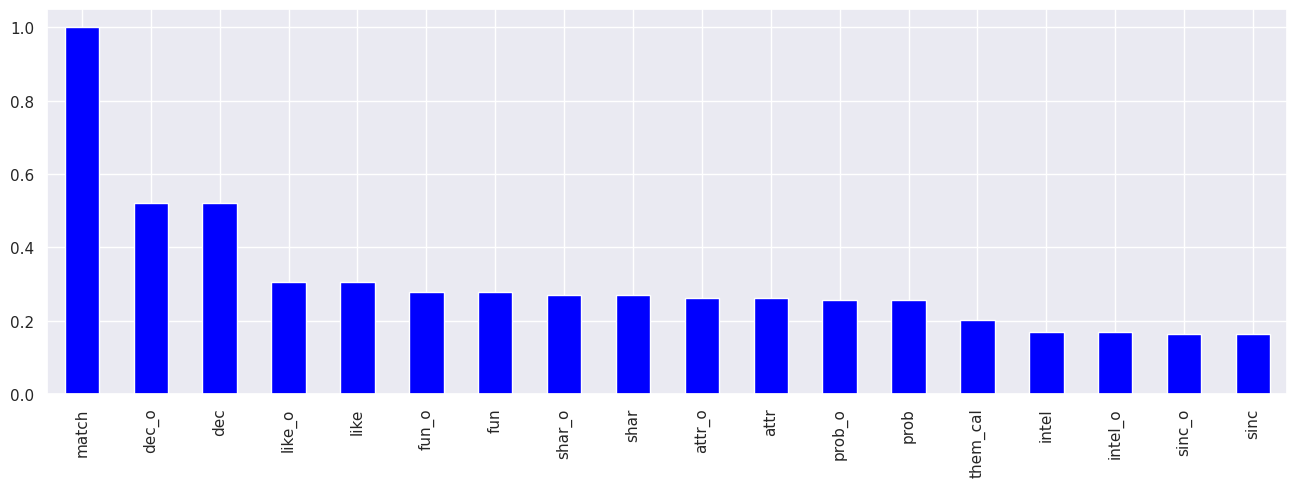

In [66]:
# Niveau de corrélation, uniquement ceux supérieurs à 0.15 de corrélation
# Corrélation négative au max à 0.10 (met_o : -0.106569)
corr_mat = df.corr(numeric_only=True)
seuil_corr_pos = 0.16
seuil_corr_neg = -0.16
corr_max = corr_mat[(corr_mat['match'] > seuil_corr_pos)]
corr_matrice = corr_max['match'].sort_values(ascending=False)
corr_matrice.plot(kind='bar')
print(corr_matrice)

In [ ]:
## HOMMES : Niveau de corrélation, uniquement ceux supérieurs à 0.15 de corrélation
corr_mat_h = df[df['gender'] == 'Homme'].corr(numeric_only=True)
corr_moy_h = corr_mat_h['match'].mean()
seuil_corr_pos_h = 0.1
seuil_corr_neg_h = -0.16
corr_max_h = corr_mat_h[corr_mat_h['match'] > seuil_corr_pos_h]
corr_matrice_h = corr_max_h['match'].sort_values(ascending=False).to_frame().T



In [ ]:
## FEMMES : Niveau de corrélation, uniquement ceux supérieurs à 0.15 de corrélation
corr_mat_f = df[df['gender'] == 'Femme'].corr(numeric_only=True)
corr_moy_f = corr_mat_f['match'].mean()
seuil_corr_pos_f = 0.10
seuil_corr_neg_f = -0.2
corr_max_f = corr_mat_f[corr_mat_f['match'] > seuil_corr_pos_f]
corr_matrice_f = corr_max_f['match'].sort_values(ascending=False).to_frame().T


On peut voir un quasi miroir entre les critères de sélection des hommes et des femmes. Seulement, les femmes semblent avoir plus d'influence sur le match.

Le 2e critère (dec pour les femmes) montre que leur décision a plus de poids que la décision de l'homme (dec en 3e position pour l'homme).

A noter également l'impact des appels :
* Le nombre d'hommes qui appellent les femmes (them_call pour les femmes) a plus d'impact sur les match. Que la femme appelle ou non (you_call) n'entre pas en compte. La femme a le pouvoir ! Une femme qui a beaucoup d'appels (du succès) a plus de chances d'avoir des match. Si elle ne compte appeler personne, cela n'a pas d'impact sur les match.

* Pour les hommes, qu'ils soient appelés (them_call à 0.13) ou qu'ils appellent (you_call à 0.11) a moins d'impact.

In [ ]:
print('Femmes')
print('______')
display(corr_matrice_f)
print()

print('Hommes')
print('______')
display(corr_matrice_h)

Femmes
______


,match,dec,dec_o,like,fun,shar,like_o,attr,prob,attr_o,fun_o,them_cal,prob_o,shar_o,intel,sinc,intel_o,match_es,sinc_o,amb_o,date_3,numdat_3,expnum,amb
match,1.0,0.585587,0.467506,0.31888,0.300767,0.298891,0.294371,0.269708,0.257152,0.256774,0.254095,0.254074,0.253991,0.242368,0.17644,0.175252,0.16253,0.157257,0.153316,0.152698,0.152036,0.14355,0.138222,0.130022



Hommes
______


,match,dec_o,dec,like_o,fun_o,shar_o,like,attr_o,prob_o,attr,prob,fun,shar,num_in_3,intel_o,sinc_o,intel,sinc,amb,expnum,amb_o,them_cal,you_call,match_es
match,1.0,0.585851,0.467229,0.31888,0.300767,0.298891,0.294179,0.269808,0.257152,0.256678,0.253903,0.253856,0.242114,0.214896,0.17644,0.175252,0.162657,0.153213,0.152805,0.149331,0.130022,0.129468,0.109319,0.104607


### Analyse

> * Déroulé du speed dating : on a vu que les critères les plus impactants pour obtenir un match font tous partie du questionnaire Scorecard. Cela signifie que le speed dating en lui-même dépend de l'expérience durant les 4 minutes de discussion.

> * On remarque que la femme a plus d'influence que l'homme. Un match a plus de chances de se produire si la femme le décide et si, déjà, elle a apprécié le candidat.

> * Dernier point : on observe que les features les plus élevées dans les critères des hommes, se terminent quasiment tous par _o pour les 9 premiers. Cela signifie que le match se produit s'il est bien vu et que ses notes sont bonnes, notamment les suivantes :
    * dec_o : décision de la femme,
    * like_o : est-ce que la femme a apprécié l'homme ?
    * fun_o : est-ce que la femme a apprécié son humour ?
    * shar_o : est-ce que la femme a apprécié sa personne ?
    * attr_o : est-ce que la femme a apprécié sa beauté ?
    * prob_o : est-ce que la femme l'acceptera ?

> * Autrement, les critères des hommes sont les suivants :
    * like : est-ce qu'il a apprécié la candidate ?
    * attr : est-ce que la candidate est séduisante ?
    * prob : est-ce qu'il a envie de la revoir ?
    * fun : est-ce qu'il apprécie l'humour de la candidate ?
    * shar : est-ce qu'il apprécie les points en commun ?


### Plus en détails...

> * Les 2 premiers critères (dec et dec_o) arrivent en premières positions. C'est logique. En effet, pour qu'il y ait match, il faut d'abord que la décision (dec) soit favorable. S'il y a décision favorable de part et d'autres, alors il y a match.

> * 1er critère : décision de la femme
    * dec pour les femmes
    * dec_o pour les hommes

> * 2e critère : décision de l'homme
    * dec_o pour les femmes
    * dec pour les hommes

> * 3e critère : est-ce que la femme a apprécié le candidat ?
    * like pour les femmes
    * like_o pour les hommes

> * 4e critère : est-ce que l'homme est drôle (humour) ?
    * fun pour les femmes
    * fun_o pour les hommes

> * 5e critère : est-ce que la femme a des points en commun avec l'homme ?
    * shar pour les femmes
    * shar_o pour les hommes

> * 6e critère : est-ce que l'homme a apprécié la candidate ?
    * like pour les hommes
    * like_o pour les femmes

> * 7e critère : est-ce que la femme a été séduite (homme séduisant) ?
    * attr pour les femmes
    * attr_o pour les hommes






## Les critères sans impact sur les *match*

**Analyse**

* Pour les femmes :
  * attr4_2 : Est-ce que la femme recherche toujours la beauté du candidat au lendemain du speed dating ? (time3)

  * sinc1_2 : Est-ce que la femme recherche toujours la sincérité de l'homme au lendemain du speed dating ? (time3)
  
  * Ces critères montrent une certaine déception des femmes quant à la séduction et sincérité des hommes.

* Pour les hommes :
  * intel4_1 : Est-ce que la femme recherchait dès le début (time1, inscription) un homme intelligent ?

  * fun4_1 : Est-ce que la femme recherchait dès le début (time1, inscription) un homme avec le sens de l'humour ?

  * shar4_3 : Est-ce que la femme recherchait dès le début (time1, inscription) un homme avec des points en commun ?

In [ ]:
corr_max_h = corr_mat_h[corr_mat_h['match'] < 0.001]
corr_matrice_h = corr_max_h['match'].sort_values(ascending=False).to_frame().T
corr_max_f = corr_mat_f[corr_mat_f['match'] < 0.001]
corr_matrice_f = corr_max_f['match'].sort_values(ascending=False).to_frame().T

print('Femmes')
print('______')
display(corr_matrice_f)
print()
print('Hommes')
print('______')

display(corr_matrice_h)

Femmes
______


,sinc1_1,amb4_3,sinc1_2,attr4_2,attr2_2,amb4_1,attr4_1,intel3_3,positin1,fun2_3,attr4_3,amb3_3,intel1_3,movies,attr2_3,shar4_2,shar4_3,intel3_2,shar1_s,idg,id,attr1_2,fun5_1,sinc3_3,sinc7_3,position,attr1_s,pf_o_amb,attr3_3,attr1_1,amb2_1,sinc1_3,sinc3_1,attr5_1,intel3_1,sinc4_3,iid,pid,exercise,amb1_2,wave,intel5_3,sinc2_3,goal,sinc2_1,amb3_s,amb1_s,zipcode,amb5_1,tvsports,attr5_2,date,attr1_3,go_out,round,career_c,amb5_2,shar1_2,intel5_2,attr7_3,shar1_3,amb3_2,age_o,order,imprelig,sinc2_2,age,intel5_1,amb3_1,shar2_2,race_o,field_cd,attr7_2,sinc4_2,imprace,pf_o_sha,shar2_1,condtn,sinc4_1,shar2_3,sinc5_3,shar1_1,pf_o_sin,shar7_2,met_o
match,0.000454,0.000411,0.000151,-0.000442,-0.001158,-0.001358,-0.001915,-0.002407,-0.00243,-0.002631,-0.003554,-0.004338,-0.004888,-0.004908,-0.005345,-0.005584,-0.006402,-0.007046,-0.007052,-0.00782,-0.007932,-0.008032,-0.008429,-0.008839,-0.009745,-0.010702,-0.011634,-0.012384,-0.012576,-0.013544,-0.013773,-0.014589,-0.014855,-0.014946,-0.01528,-0.015831,-0.01611,-0.016621,-0.017294,-0.017723,-0.01798,-0.018051,-0.018245,-0.018924,-0.018926,-0.019999,-0.023141,-0.023374,-0.025201,-0.025536,-0.025808,-0.025826,-0.026236,-0.027732,-0.030172,-0.030942,-0.031104,-0.032576,-0.032761,-0.034097,-0.034439,-0.034653,-0.034775,-0.035743,-0.035825,-0.036272,-0.036645,-0.036819,-0.037619,-0.037705,-0.037802,-0.038905,-0.03894,-0.04145,-0.041827,-0.042411,-0.045059,-0.04727,-0.050697,-0.050788,-0.051295,-0.057422,-0.063583,-0.071095,-0.124451



Hommes
______


,fun4_1,pf_o_sin,intel4_1,goal,attr3_s,sinc2_2,career_c,shopping,attr1_2,sinc3_3,intel5_3,intel1_s,tuition,sinc5_1,partner,field_cd,position,positin1,sinc5_2,sinc2_1,shar1_2,amb1_1,pf_o_att,intel3_s,museums,iid,intel1_3,pid,imprelig,wave,sinc5_3,shar7_3,sinc3_2,amb1_2,attr2_2,theater,shar4_1,amb4_1,shar2_1,age,sinc1_s,shar2_2,amb1_s,amb7_2,round,tv,age_o,race,movies,amb1_3,order,shar1_1,sinc1_2,shar1_3,condtn,fun2_1,shar4_2,shar7_2,intel4_2,shar1_s,pf_o_sha,imprace,sinc2_3,amb4_3,sinc1_1,sinc4_1,sinc7_3,sinc4_2,amb4_2,sinc4_3,sinc1_3,go_out,met_o,date,sinc7_2,amb7_3,shar2_3
match,0.000891,0.000454,-0.001519,-0.002025,-0.002853,-0.003607,-0.004008,-0.004547,-0.004596,-0.005194,-0.005237,-0.005287,-0.006951,-0.007508,-0.007545,-0.009154,-0.00972,-0.010607,-0.010793,-0.01087,-0.011117,-0.012265,-0.013544,-0.013673,-0.014988,-0.015491,-0.015689,-0.01611,-0.01663,-0.01683,-0.017547,-0.020244,-0.021003,-0.021276,-0.029087,-0.029561,-0.030223,-0.030638,-0.031286,-0.032618,-0.033434,-0.035778,-0.035921,-0.035944,-0.036194,-0.036735,-0.036931,-0.038136,-0.039519,-0.039575,-0.041654,-0.042375,-0.043522,-0.044641,-0.044661,-0.046118,-0.049944,-0.050956,-0.055541,-0.055854,-0.057422,-0.058376,-0.059099,-0.063507,-0.063523,-0.065729,-0.067103,-0.067688,-0.075636,-0.076917,-0.083935,-0.090361,-0.093828,-0.102375,-0.117327,-0.119984,-0.137561


### Les critères redhibitoires pour les  *match*
Lorsque le taux de corrélation est grand mais négatif, cela signifie que la valeur du match sera petit, donc un rejet (pas de match). Indéniablement, il n'y aura pas de suite.


In [ ]:
seuil = -0.05

corr_max_h = corr_mat_h[corr_mat_h['match'] < seuil]
corr_matrice_h = corr_max_h['match'].sort_values(ascending=True).to_frame().T
corr_max_f = corr_mat_f[corr_mat_f['match'] < seuil]
corr_matrice_f = corr_max_f['match'].sort_values(ascending=True).to_frame().T

print('Femmes')
print('______')
display(corr_matrice_f)
print()
print('Hommes')
print('______')

display(corr_matrice_h)

Femmes
______


,met_o,shar7_2,pf_o_sin,shar1_1,sinc5_3,shar2_3,sinc4_1
match,-0.124451,-0.071095,-0.063583,-0.057422,-0.051295,-0.050788,-0.050697



Hommes
______


,shar2_3,amb7_3,sinc7_2,date,met_o,go_out,sinc1_3,sinc4_3,amb4_2,sinc4_2,sinc7_3,sinc4_1,sinc1_1,amb4_3,sinc2_3,imprace,pf_o_sha,shar1_s,intel4_2,shar7_2
match,-0.137561,-0.119984,-0.117327,-0.102375,-0.093828,-0.090361,-0.083935,-0.076917,-0.075636,-0.067688,-0.067103,-0.065729,-0.063523,-0.063507,-0.059099,-0.058376,-0.057422,-0.055854,-0.055541,-0.050956


> * Pour les femmes :
    * met_o : est-ce que la femme a déjà rencontré le candidat ? Visiblement, si elle l'a déjà rencontré, le candidat n'a aucune chance.
* Pour les hommes :
    * shar2_3 : est-ce que l'homme pense toujours que la femme recherche des points communs, plusieurs semaines après le speed dating ? L'homme recherche autre chose que des points communs chez les candidates.
    * Il en est de même pour l'ambition (amb7_3, plusieurs semaines après) et la sincérité (sinc7_2, au lendemain du speed dating)

# Conclusion

La question à l'origine de cette exploration était la suivante : quels sont les critères menant à un match ? Autrement dit, qu'est-ce que les femmes recherchent et apprécient chez un homme et inversement ?

Tout d'abord, on peut observer une sorte d'énergie motrice des femmes. Elles ont le pouvoir. Il est donc important de prévoir de leur présenter des hommes de qualité car elles décideront avec fermeté.

Les femmes recherchent avant tout une belle rencontre qui se passe bien avec un homme drôle, avec qui elles ont des points en commun et qui est séduisant. Par-contre, elles ne souhaitent pas croiser un homme qu'elles ont déjà rencontré auparavant.

Les hommes sont moins exigeants sur leurs préférences : c'est d'abord la décision de la femme qui l'emporte. Néanmoins, ils savent ce qui leur convient :

  * like : est-ce qu'il a apprécié la candidate ?
  * attr : est-ce que la candidate est séduisante ?
  * prob : est-ce qu'il a envie de la revoir ?

En définitive, Tinder avait déjà des indices ou un ressenti allant dans le sens du pouvoir des femmes et de l'importance capitale de la rencontre.

C'est ce qui a certainement conduit Tinder à mettre en scène des marqueurs dans les waves 18 à 21, avec un livre ou un magazine à la main, stratégie qui a moyennement fonctionné si on en croit les chiffres des match en fonction du nombre de candidats (Analyse_des_participants_par_Wave).

Si des marqueurs doivent être mis en évidence, il serait souhaitable de poursuivre mais dans la direction de plus d'authenticité et de séduction car ces 2 valeurs réunissent finalement les hommes et les femmes qui ont participé à ces speed dating.
